In [374]:
from src.doc2vec import Doc2VecSVM
from src.load_files import *

In [375]:
doc2vecsvm = Doc2VecSVM(doc2vec_model="model3")
docmodel = doc2vecsvm.doc2vec_model
wv = docmodel.wv

In [3]:
d = load_all_docs()

Loading files: 100%|██████████| 100000/100000 [00:02<00:00, 42863.01it/s]

*** LOADED DOCUMENTS FOR DOC2VEC ***


In [4]:
import numpy as np

In [5]:
t = []
doc = d[8]
for w in doc:
    if w in wv.vocab:
        ww = docmodel.wv.get_vector(w)
        t.append(ww)
X = np.array(t)

In [6]:
np.array(X).shape

(123, 300)

In [7]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from adjustText import adjust_text

In [8]:
X_embedded = TSNE(n_components=2, perplexity=6).fit_transform(X)

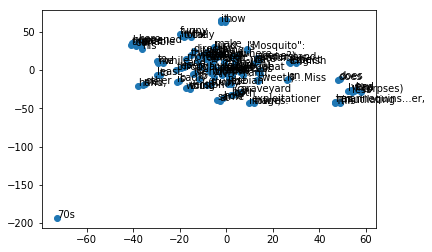

In [9]:
x = X_embedded[:,0]
y = X_embedded[:,1]
fig, ax = plt.subplots()
ax.scatter(x,y)
for i,txt in enumerate(d[5]):
    ax.annotate(txt, (x[i], y[i]))

In [10]:
u = ["dazzling,brilliant,phenomenal,excellent,fantastic","suck,terrible,awful,unwatchable,hideous","gripping,mesmerizing,riveting,spectacular,cool,awesome,thrilling,badass,excellent,moving,exciting","bad,cliched, sucks,boring,stupid,slow"]

In [11]:
pos = u[0].split(",")+u[2].split(",")
neg = u[1].split(",")+u[3].split(",")

In [12]:
c = pos+neg
len(pos)

16

In [13]:
def tsne_words_wv(wordlist):
    t = []
    wordlist = [word for word in wordlist if word in wv.vocab]
    for w in wordlist:
        ww = docmodel.wv.get_vector(w)
        t.append(ww)
    X = np.array(t)
    
    tsne_plot(X,wordlist)

def tsne_words_docv(wordlist):
    t = []
    for w in wordlist:
        ww = docmodel.infer_vector([w])
        t.append(ww)
    X = np.array(t)
    tsne_plot(X,wordlist)
    

def tsne_plot(X, labels, **kwargs):
    X_embedded = TSNE(n_components=2, perplexity=6).fit_transform(X)
    x = X_embedded[:,0]
    y = X_embedded[:,1]
    fig, ax = plt.subplots()
    ax.scatter(x,y)
    ax.plot(x[:16], y[:16], marker='o', linestyle='', label="positive")
    ax.plot(x[16:], y[16:], marker='o', linestyle='', label="negative")
    ax.legend()
#     for i,txt in enumerate(labels):
#         ax.annotate(txt, (x[i], y[i]))
    texts = [plt.text(x[i], y[i], txt, ha='center', va='center') for i,txt in enumerate(labels)]
    adjust_text(texts)

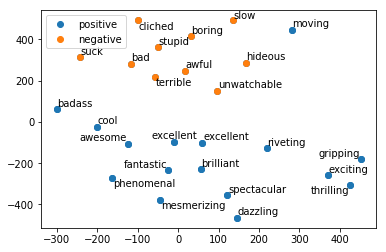

In [14]:
tsne_words_wv(c)

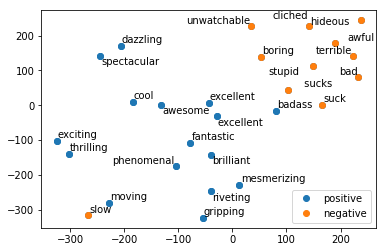

In [15]:
tsne_words_docv(c)

In [21]:
from nltk import pos_tag
import nltk

In [22]:
pos_tag(d[0])

[('Once', 'RB'),
 ('again', 'RB'),
 ('Mr.', 'NNP'),
 ('Costner', 'NNP'),
 ('has', 'VBZ'),
 ('dragged', 'VBN'),
 ('out', 'RP'),
 ('a', 'DT'),
 ('movie', 'NN'),
 ('for', 'IN'),
 ('far', 'RB'),
 ('longer', 'JJR'),
 ('than', 'IN'),
 ('necessary.', 'JJ'),
 ('Aside', 'NNP'),
 ('from', 'IN'),
 ('the', 'DT'),
 ('terrific', 'JJ'),
 ('sea', 'NN'),
 ('rescue', 'NN'),
 ('sequences,', 'NN'),
 ('of', 'IN'),
 ('which', 'WDT'),
 ('there', 'EX'),
 ('are', 'VBP'),
 ('very', 'RB'),
 ('few', 'JJ'),
 ('I', 'PRP'),
 ('just', 'RB'),
 ('did', 'VBD'),
 ('not', 'RB'),
 ('care', 'VB'),
 ('about', 'IN'),
 ('any', 'DT'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('characters.', 'NN'),
 ('Most', 'JJS'),
 ('of', 'IN'),
 ('us', 'PRP'),
 ('have', 'VBP'),
 ('ghosts', 'NNS'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('closet,', 'NN'),
 ('and', 'CC'),
 ("Costner's", 'NNP'),
 ('character', 'NN'),
 ('are', 'VBP'),
 ('realized', 'VBN'),
 ('early', 'JJ'),
 ('on,', 'NN'),
 ('and', 'CC'),
 ('then', 'RB'),
 ('forgotten', 'VB'),
 ('until', 'IN'),


In [26]:
nltk.help.upenn_tagset('JJ')

JJ: adjective or numeral, ordinal
    third ill-mannered pre-war regrettable oiled calamitous first separable
    ectoplasmic battery-powered participatory fourth still-to-be-named
    multilingual multi-disciplinary ...


In [39]:
sentence = "I hate the movie although the plot is interesting" 
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib
import matplotlib.ticker as plticker

In [382]:

def plot_var(sentence):
    sentenceArray = sentence.split(" ")[::-1]

    wordVectors = []
    for word in sentenceArray:
        vec = docmodel.infer_vector([word])
        wordVectors.append(np.array(vec))

    varianceVectors = []
    ns = len(wordVectors)
    for i in range(ns):
        wordVec = wordVectors[i]
        varyVec = np.array(wordVec)
        for j in range(len(wordVec)):
            varyVec[j] = wordVec[j]
            for i2 in range(ns):
                if not i2 == i:
                    varyVec[j] -= wordVectors[i2][j]/ns
            varyVec[j] = abs(varyVec[j]) ** 2
        varianceVectors.append(varyVec)

    pc_kwargs = {'rasterized': True, 'cmap': 'Blues'}
    fig, ax = plt.subplots(figsize=(8, 4), constrained_layout=True)

    ax.get_xaxis().set_ticklabels([])
    ax.get_yaxis().set_ticklabels(sentenceArray)
    # loc = plticker.LinearLocator(len(wordVectors)+1)

    loc = plticker.MultipleLocator(1) # this locator puts ticks at regular intervals

    # ax.yaxis.set_major_locator(loc)
    # dx = 0/72.; dy = 10/72. 
    offset = matplotlib.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)  
    for tick in ax.yaxis.get_major_ticks():
        print(tick)
    for label in ax.yaxis.get_majorticklabels():
        label.set_transform(label.get_transform() + offset)

    ax.set_title(sentence)
    im = ax.pcolormesh(varianceVectors, **pc_kwargs)
    ax.xaxis.set_ticks_position('none') 
    fig.colorbar(im, ax=ax, shrink=0.6)


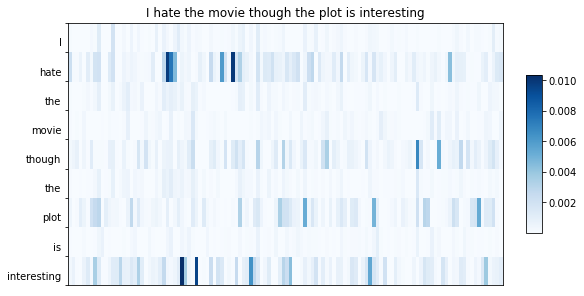

In [389]:
plot_var("I hate the movie though the plot is interesting")

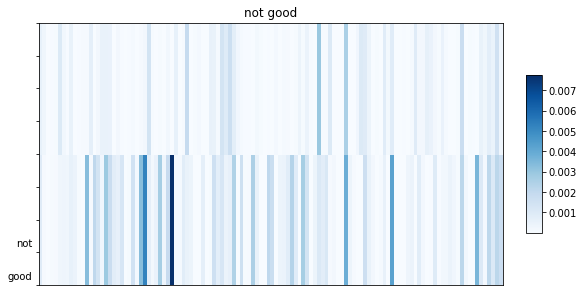

In [390]:
plot_var("not good")

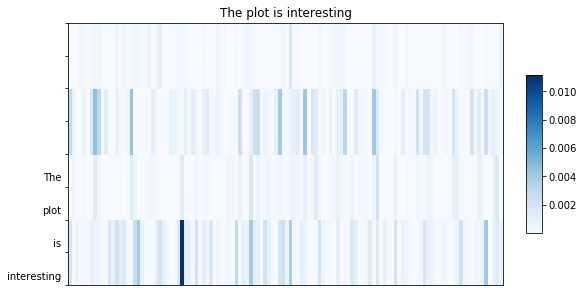

In [391]:
plot_var("The plot is interesting")

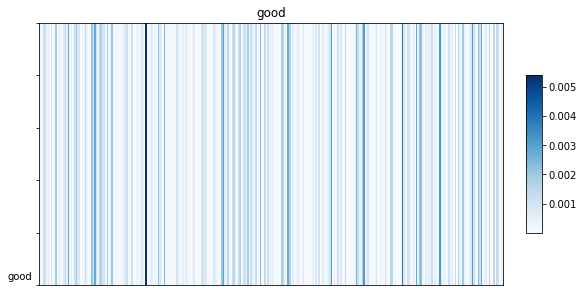

In [74]:
plot_var("good")

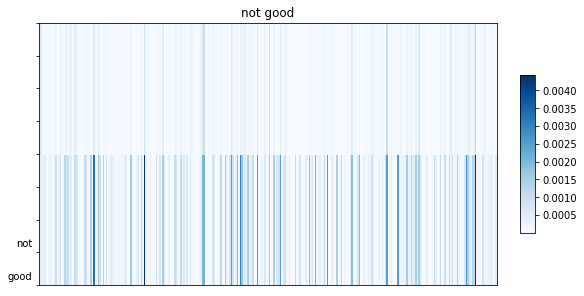

In [76]:
plot_var("not good")

In [378]:

def plot_var1(sentence):
    sentenceArray = sentence.split(" ")[::-1]
    docv = docmodel.infer_vector(sentenceArray)
    wordVectors = []
    for word in sentenceArray:
        vec = docmodel.wv.get_vector(word)
#         vec = docmodel.infer_vector([word])
        wordVectors.append(np.array(vec))

    varianceVectors = []
    ns = len(wordVectors)
    for i in range(ns):
        wordVec = wordVectors[i]
        varyVec = np.array(wordVec)
        for j in range(len(wordVec)):
            varyVec[j] = wordVec[j] - docv[j]
            varyVec[j] = varyVec[j] ** 2
        varianceVectors.append(varyVec)

    pc_kwargs = {'rasterized': True, 'cmap': 'Blues'}
    fig, ax = plt.subplots(figsize=(8, 4), constrained_layout=True)

    ax.get_xaxis().set_ticklabels([])
    ax.get_yaxis().set_ticklabels(sentenceArray)
    # loc = plticker.LinearLocator(len(wordVectors)+1)

    loc = plticker.MultipleLocator(1) # this locator puts ticks at regular intervals

    # ax.yaxis.set_major_locator(loc)
    # dx = 0/72.; dy = 10/72. 
    offset = matplotlib.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)  
    for tick in ax.yaxis.get_major_ticks():
        print(tick)
    for label in ax.yaxis.get_majorticklabels():
        label.set_transform(label.get_transform() + offset)

    ax.set_title(sentence)
    im = ax.pcolormesh(varianceVectors, **pc_kwargs)
    ax.xaxis.set_ticks_position('none') 
    fig.colorbar(im, ax=ax, shrink=0.6)


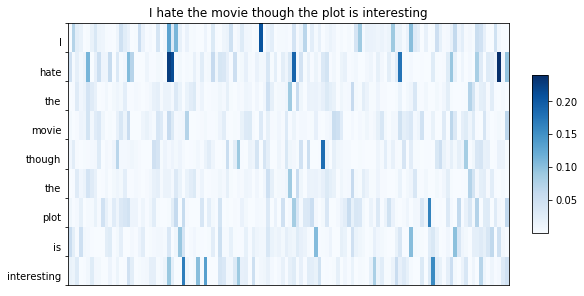

In [379]:
plot_var1("I hate the movie though the plot is interesting")

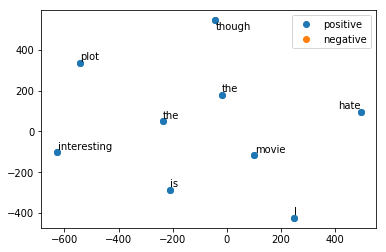

In [121]:
tsne_words_wv("I hate the movie though the plot is interesting".split(" "))

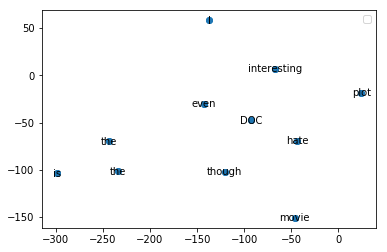

In [144]:
sentence = "I hate the movie even though the plot is interesting".split(" ")
t = []
wordlist = [word for word in sentence if word in wv.vocab]
for w in wordlist:
    ww = docmodel.wv.get_vector(w)
    t.append(ww)
t.append(docmodel.infer_vector(wordlist))
X = np.array(t)

X_embedded = TSNE(n_components=2, perplexity=1.5).fit_transform(X)
x = X_embedded[:,0]
y = X_embedded[:,1]
fig, ax = plt.subplots()
ax.scatter(x,y)
ax.plot(x, y, marker='o', linestyle='')
ax.legend()
#     for i,txt in enumerate(labels):
#         ax.annotate(txt, (x[i], y[i]))
texts = [plt.text(x[i], y[i], txt, ha='center', va='center') for i,txt in enumerate(wordlist+["DOC"])]

In [163]:
from collections import defaultdict
tagged = defaultdict(dict)
for w,vec in docmodel.wv.vocab.items():
    word, tag = pos_tag([w])[0]
    tagged[tag][word] = vec

In [104]:
pos_tag(sentence.split(" "))

[('I', 'PRP'),
 ('hate', 'VBP'),
 ('the', 'DT'),
 ('movie', 'NN'),
 ('although', 'IN'),
 ('the', 'DT'),
 ('plot', 'NN'),
 ('is', 'VBZ'),
 ('interesting', 'VBG')]

In [49]:
# nltk.help.upenn_tagset('IN')
nltk.help.upenn_tagset('JJ*')
nltk.help.upenn_tagset('NN*')
nltk.help.upenn_tagset('IN*')
nltk.help.upenn_tagset('VB*')
# nltk.help.upenn_tagset('IN')

JJ: adjective or numeral, ordinal
    third ill-mannered pre-war regrettable oiled calamitous first separable
    ectoplasmic battery-powered participatory fourth still-to-be-named
    multilingual multi-disciplinary ...
JJR: adjective, comparative
    bleaker braver breezier briefer brighter brisker broader bumper busier
    calmer cheaper choosier cleaner clearer closer colder commoner costlier
    cozier creamier crunchier cuter ...
JJS: adjective, superlative
    calmest cheapest choicest classiest cleanest clearest closest commonest
    corniest costliest crassest creepiest crudest cutest darkest deadliest
    dearest deepest densest dinkiest ...
NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...
NNP: noun, proper, singular
    Motown Venneboerger Czestochwa Ranzer Conchita Trumplane Christos
    Oceanside Escobar Kreisler Sawyer Couga

In [166]:
tagged['JJ']

{'unimaginative': <gensim.models.keyedvectors.Vocab at 0x7f5121ad5e10>,
 'limited': <gensim.models.keyedvectors.Vocab at 0x7f5121d55490>,
 'two-dimensional': <gensim.models.keyedvectors.Vocab at 0x7f5123a6ed50>,
 'magnetic': <gensim.models.keyedvectors.Vocab at 0x7f5123d7ac50>,
 'dynamic': <gensim.models.keyedvectors.Vocab at 0x7f5122cd9210>,
 'non-sensical': <gensim.models.keyedvectors.Vocab at 0x7f5124a2fe50>,
 'asian': <gensim.models.keyedvectors.Vocab at 0x7f5121fdf0d0>,
 'tenuous': <gensim.models.keyedvectors.Vocab at 0x7f5123d7ad90>,
 'undisputed': <gensim.models.keyedvectors.Vocab at 0x7f51234ee290>,
 'psychopathic': <gensim.models.keyedvectors.Vocab at 0x7f5122fb0a90>,
 'eligible': <gensim.models.keyedvectors.Vocab at 0x7f5121ade110>,
 'unanswered': <gensim.models.keyedvectors.Vocab at 0x7f5123217b10>,
 'MUCH': <gensim.models.keyedvectors.Vocab at 0x7f5121d55bd0>,
 'Western': <gensim.models.keyedvectors.Vocab at 0x7f5124a2f910>,
 'Scorcese': <gensim.models.keyedvectors.Vocab at

In [226]:
dv = docmodel.infer_vector(d[0])
wv = docmodel.wv

tags = []
dists = []
vecs = []
labels = []
for w,tag in pos_tag(d[0]):
    if w in wv.vocab:
        v = wv.get_vector(w)
        vecs.append((v-dv) ** 2)
        dist = np.linalg.norm(v-dv)
        dists.append(dist)
        tags.append(tag)
        labels.append(w)
        
tags = np.array(tags)
dists = np.array(dists)

206

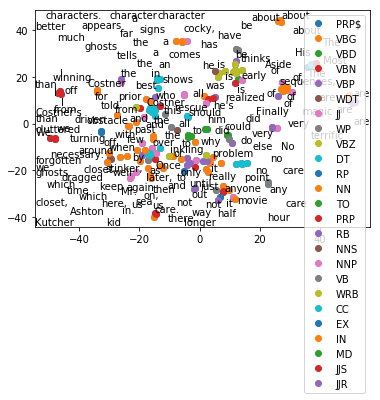

In [251]:
X = np.array(vecs)

X_embedded = TSNE(n_components=2, perplexity=4).fit_transform(X)
x = X_embedded[:,0]
y = X_embedded[:,1]
fig, ax = plt.subplots()
ax.scatter(x,y)
for tg in set(tags):
    ax.plot(x[tags==tg], y[tags==tg], marker='o', linestyle='', label=tg)
ax.legend()
# for i,txt in enumerate(labels):
#     ax.annotate(txt, (x[i], y[i]))
texts = [plt.text(x[i], y[i], txt, ha='center', va='center') for i,txt in enumerate(labels)]
adjust_text(texts)

In [249]:
for tg in ['JJ', "NN", "VB"]:
    m = np.mean(dists[tags==tg])
    print(tg,m)

('JJ', 4.348454)
('NN', 4.3541093)
('VB', 4.3105087)


In [255]:
import src
reload(src)
reload(src.load_files)
d__=load_all_docs()

Loading files: 100%|██████████| 100000/100000 [00:03<00:00, 32724.89it/s]

*** LOADED DOCUMENTS FOR DOC2VEC ***


In [216]:
x[tags=='RB']

array([-10.284937 , -10.823033 ,  -3.7990584,  40.16217  , -15.120215 ,
       -24.365822 , -12.155375 , -24.386036 , -16.39606  ,  40.117714 ,
       -20.766697 ,  22.589035 ,   1.4878387], dtype=float32)

In [261]:
p = load_all_pang_docs()

Loading files from POS: 100%|██████████| 1000/1000 [00:01<00:00, 761.53it/s]


In [264]:
p = np.array(p)

In [272]:
labels = p[:, 0]
filenames = p[:, 1]
wordlists = p[:, 2]

In [273]:
from sklearn.feature_extraction.text import CountVectorizer

In [297]:
wll = np.concatenate(wordlists)

In [332]:
from collections import Counter
cw = Counter(wll)
cw.most_common()

i=0
x=0
ws = []
while i<25:
    word,count = cw.most_common()[x]
    word,tag = pos_tag([word])[0]
    x+=1
    if ("JJ" in tag) and word in wv.vocab:
        ws.append(word)
        i+=1
        
    
wvecs = map(lambda x: docmodel.wv.get_vector(x), ws)


In [333]:
wvecs = np.array(wvecs)
X=wvecs

174

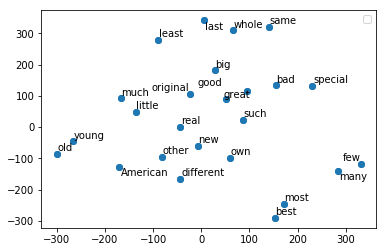

In [334]:
X_embedded = TSNE(n_components=2, perplexity=5).fit_transform(X)
x = X_embedded[:,0]
y = X_embedded[:,1]
fig, ax = plt.subplots()
ax.scatter(x,y)

ax.plot(x, y, marker='o', linestyle='')

ax.legend()
# for i,txt in enumerate(ws):
#     ax.annotate(txt, (x[i], y[i]))
texts = [plt.text(x[i], y[i], txt, ha='center', va='center') for i,txt in enumerate(ws)]
adjust_text(texts)

In [291]:
c.vocabulary

In [311]:
ws

array(['film', 'movie', 'time', 'good', 'most', 'story', 'character',
       'much', 'other', 'characters', 'way', 'films', 'plot', 'people',
       'scene', 'little', 'life', 'bad', 'scenes', 'best', 'many', 'man',
       'such', 'movies', 'great', 'action', 'work', 'end', 'something',
       'few', 'love', 'director', 'audience', 'performance', 'new',
       'same', 'role', 'world', 'think', 'real', 'funny', 'own', 'John',
       'big', 'fact', 'comedy', 'played', 'look', 'script', 'cast'],
      dtype='|S11')

In [328]:
len(ws)

50

6
['good']
['very', 'good']
['bad']
['really', 'bad']
['awful']
['really', 'awful']


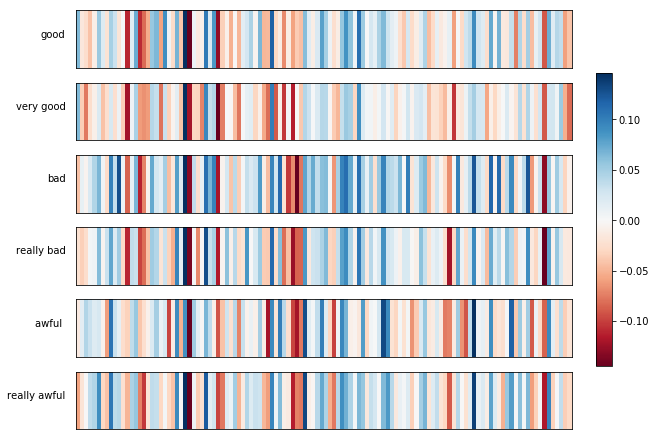

In [485]:

def p(sentences):
    sentenceArrays = map(lambda x:x.split(), sentences)
    print(len(sentenceArrays))
    pc_kwargs = {'rasterized': True, 'cmap': 'RdBu'}
    fig, axs = plt.subplots(len(sentenceArrays), 1,figsize=(9, 6), constrained_layout=True)

    # loc = plticker.MultipleLocator(1) # this locator puts ticks at regular intervals

    print(axs)
    for i,ax in enumerate(axs):
        ax.get_yaxis().set_ticklabels([])
        ax.yaxis.set_ticks_position('none') 
        ax.get_xaxis().set_visible(False)
        ax.set_ylabel(sentences[i], rotation='horizontal', ha='right')
        print(sentenceArrays[i])
        
        for label in ax.yaxis.get_majorticklabels():
            label.set_transform(label.get_transform() + offset)

        dvec = docmodel.infer_vector(sentenceArrays[i])

        
        im = ax.pcolormesh([dvec], **pc_kwargs)
        ax.xaxis.set_ticks_position('none')
    fig.colorbar(im, ax=axs, shrink=0.7)
    
    

p(["good","very good","bad", "really bad","awful ","really awful"])

6
['bad']
['not', 'bad']
['good']
['not', 'good']
['I', 'did', 'like', 'it']
['I', "didn't", 'like', 'it']


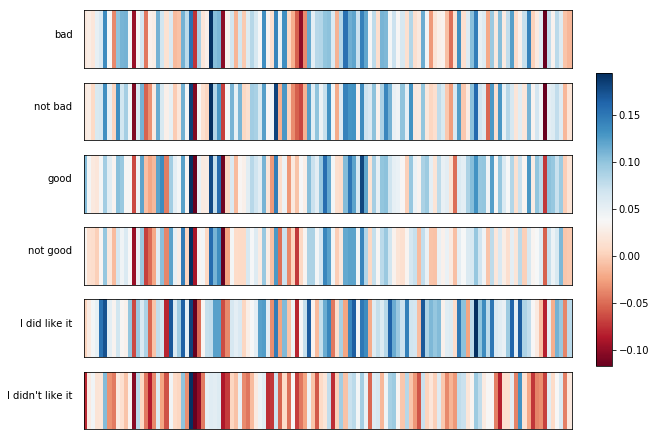

In [471]:
p(["bad", "not bad", "good", "not good", "I did like it", "I didn't like it"])

In [472]:
docmodel.vector_size

120

In [527]:
intensify_sentences = ["bad", "really bad", "very bad", "good", "very good", "really good", "amazing", "really amazing"]
negation_sentences = ["it was bad", "it was not bad", "I liked it", "I did not like it", "It was good", "It was not good", "what a great film", "what an awful film", "amazing work", "not amazing work", "the best film ever", "not the best film ever", "to", "ok", "useful", "random", "I", "the", "sometimes", "was"]

6

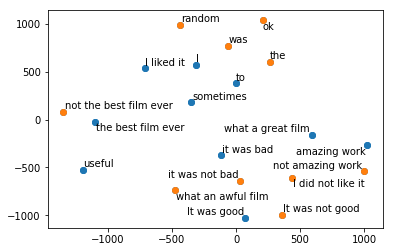

In [533]:
X = map(lambda x: docmodel.infer_vector(x.split(" ")),negation_sentences)
labels = negation_sentences

X_embedded = TSNE(n_components=2, perplexity=10).fit_transform(X)
x = X_embedded[:,0]
y = X_embedded[:,1]
fig, ax = plt.subplots()
ax.scatter(x,y)
ax.plot(x[0::2], y[0::2], marker='o', linestyle='', label="neg")
ax.plot(x[1::2], y[1::2], marker='o', linestyle='', label="pos")
# for i,txt in enumerate(labels):
#     ax.annotate(txt, (x[i], y[i]))
texts = [plt.text(x[i], y[i], txt, ha='center', va='center') for i,txt in enumerate(labels)]
adjust_text(texts)

In [423]:
for i,a in enumerate(axs):
    print(i)

0
1
